# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- Lucas Lu
- 10102688
- Section 2
- The Moon and Sixpence
- Jan 4th, 2022

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2022-01-12 04:31:19.188069


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.7.12


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [8]:
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


## 1.1: Clustering Algorithm #1

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler().fit(df1)

In [11]:
df_standardized = df1.copy()
df_standardized[df_standardized.columns] = scaler.transform(df1)
df_standardized.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


In [12]:
from sklearn.cluster import KMeans

objective_function=[] 
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='k-means++', random_state=1)
    clustering.fit(df_standardized)
    objective_function.append(clustering.inertia_)

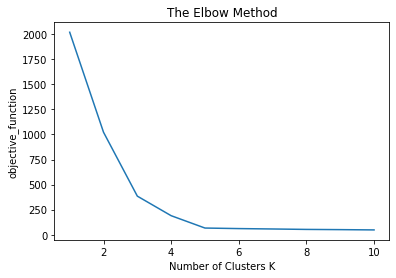

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

We can observe that the "elbow" is the number 4 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 4.

In [14]:
%%time
# Fit the model.
model = KMeans(n_clusters=4, random_state=1).fit(df_standardized)

# Get results.
df_standardized['cluster'] = model.predict(df_standardized)

CPU times: user 63.2 ms, sys: 1.82 ms, total: 65 ms
Wall time: 51.3 ms


In [15]:
df_standardized.head()

,Age,Income,SpendingScore,Savings,cluster
0,-0.042287,0.062733,1.103593,-1.072467,0
1,-0.000821,0.174811,1.102641,-1.303473,0
2,0.123577,-0.021200,0.761727,-0.526556,0
3,-0.000821,-0.031712,1.004705,-0.913395,0
4,1.160228,-1.606165,-0.602619,1.012686,1


In [16]:
# inverse the standardization to get original values
orig = scaler.inverse_transform(df_standardized[['Age','Income','SpendingScore','Savings']])
kmeans_final = df_standardized.copy()
kmeans_final[['Age','Income','SpendingScore','Savings']] = orig
kmeans_final.head()

,Age,Income,SpendingScore,Savings,cluster
0,58.0,77769.0,0.791329,6559.829923,0
1,59.0,81799.0,0.791082,5417.661426,0
2,62.0,74751.0,0.702657,9258.992965,0
3,59.0,74373.0,0.765680,7346.334504,0
4,87.0,17760.0,0.348778,16869.507130,1


In [17]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score
print('calinski_harabasz_score:', calinski_harabasz_score(kmeans_final.drop(columns='cluster'), kmeans_final['cluster']))
print('silhouette_score:', silhouette_score(kmeans_final.drop(columns='cluster'), kmeans_final['cluster']))

calinski_harabasz_score: 4449.578274990474
silhouette_score: 0.7138293172501069


## 1.2: Clustering Algorithm #2

In [18]:
display(df_standardized.head(2))
df_standardized.shape

,Age,Income,SpendingScore,Savings,cluster
0,-0.042287,0.062733,1.103593,-1.072467,0
1,-0.000821,0.174811,1.102641,-1.303473,0


(505, 5)

In [19]:
from sklearn.cluster import DBSCAN

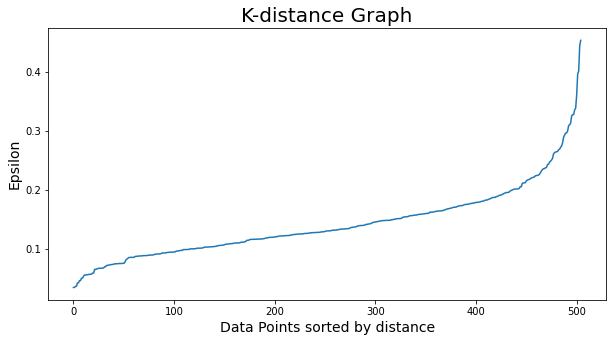

In [20]:
from sklearn.neighbors import NearestNeighbors
X = df_standardized.drop(columns='cluster')
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimal value should be the value at which we see maximum curvature which in this case seems to be near 0.25.

In [21]:
%%time
dbscan_opt=DBSCAN(eps=0.25,min_samples=5)
dbscan_opt.fit(X)
dbscan_final = df_standardized.copy()
dbscan_final['cluster'] = dbscan_opt.labels_

CPU times: user 10.7 ms, sys: 921 µs, total: 11.6 ms
Wall time: 11 ms


In [22]:
dbscan_final.head()

,Age,Income,SpendingScore,Savings,cluster
0,-0.042287,0.062733,1.103593,-1.072467,0
1,-0.000821,0.174811,1.102641,-1.303473,0
2,0.123577,-0.021200,0.761727,-0.526556,0
3,-0.000821,-0.031712,1.004705,-0.913395,0
4,1.160228,-1.606165,-0.602619,1.012686,1


In [23]:
# inverse the standardization to get original values
orig = scaler.inverse_transform(dbscan_final[['Age','Income','SpendingScore','Savings']])
dbscan_final[['Age','Income','SpendingScore','Savings']] = orig
dbscan_final.head()

,Age,Income,SpendingScore,Savings,cluster
0,58.0,77769.0,0.791329,6559.829923,0
1,59.0,81799.0,0.791082,5417.661426,0
2,62.0,74751.0,0.702657,9258.992965,0
3,59.0,74373.0,0.765680,7346.334504,0
4,87.0,17760.0,0.348778,16869.507130,1


In [24]:
print('calinski_harabasz_score:', calinski_harabasz_score(dbscan_final.drop(columns='cluster'), dbscan_final['cluster']))
print('silhouette_score:', silhouette_score(dbscan_final.drop(columns='cluster'), dbscan_final['cluster']))

calinski_harabasz_score: 663.3247849633888
silhouette_score: 0.5442393959021247


## 1.3 Model Comparison

In [25]:
print(kmeans_final.cluster.value_counts())

0    157
2    151
1    147
3     50
Name: cluster, dtype: int64


In [26]:
print(dbscan_final.cluster.value_counts())

 0    153
 1    137
 2    114
-1     46
 4     38
 3     17
Name: cluster, dtype: int64


K-Means algorithm is a better model for this particular dataset for the following reasons:
1. Calinski-Harabasz Index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances. K-Means algorithm produces a value of 4450, while DBSCAN produces a value of only 663. The K-Means algorithm is a better model using this criteria.
2. Silhouette score ranges from -1 to 1. A value closer to 1 means clusters are well apart from each other and clearly distinguished. K-Means algorithm has a value of 0.71, while DBSCAN has a value of only 0.54. The K-Means algorithm is a better model using this criteria.
3. K-Means algorithm assigns 4 clusters to 505 instances to reach optimal clustering, while DBSCAN assigns 6 clusters. Considering the dataset is not large, 4 clusters seem more reasonable to use and implement for the company than 6 clusters. This is because companies usually develope different marketing strategies to different cluster of customers and less clusters can save development and implementation costs. The K-Means algorithm is a better model using this criteria.
4. From execution time point of view, K-Means algorithm takes 46.5ms to run while DBSCAN takes 9.02ms to run. However since both algorithms executes pretty fast, the slight difference can be ignored for this dataset.

In conclusion, K-Means algorithm is a better model for this dataset.

## 1.4 Personas

In [27]:
cluster_avg = kmeans_final.groupby(['cluster']).mean()
population_avg = kmeans_final.mean()
relative_imp = cluster_avg / population_avg - 1

In [28]:
relative_imp.round(2)

,Age,Income,Savings,SpendingScore,cluster
cluster,,,,,
0,0.02,-0.04,-0.42,0.53,NaN
1,0.49,-0.63,0.40,-0.35,NaN
2,-0.30,0.43,0.26,-0.47,NaN
3,-0.59,0.70,-0.66,0.78,NaN


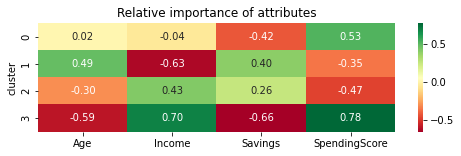

In [29]:
import seaborn as sns
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp.drop(columns='cluster'), annot=True, fmt='.2f'
, cmap='RdYlGn')
plt.show()

In [30]:
df_standardized.head(1)

,Age,Income,SpendingScore,Savings,cluster
0,-0.042287,0.062733,1.103593,-1.072467,0


In [31]:
df_melt = pd.melt(df_standardized.reset_index(),
id_vars=['cluster'],
value_vars=['Age', 'Income', 'SpendingScore', 'Savings'],
var_name='Attribute',
value_name='Value')
df_melt.head()

,cluster,Attribute,Value
0,0,Age,-0.042287
1,0,Age,-0.000821
2,0,Age,0.123577
3,0,Age,-0.000821
4,1,Age,1.160228


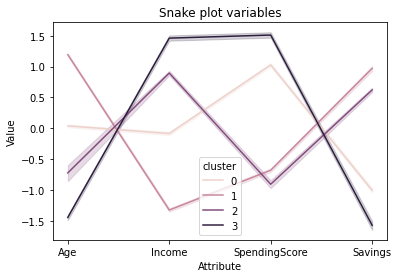

In [32]:
plt.title('Snake plot variables')
sns.lineplot(x="Attribute"
, y="Value"
, hue='cluster'
, data=df_melt)

From the above Snake plot, it's easy to notice that on average, customers from cluster 3 are the youngest, having the highest salary, spending the most, and saving the least among all cusomter groups. This cluster of customers should be targeted first by the store when designing marketing campaigns to generate the most revenue. However since the dataset above is standardized, it's not easy to see the exact value for each attribute. In the following step, let's look at their original values.

In [33]:
# calculate the mean of Age, Income, SpendingScore and Savings for each cluster
kmeans_final.groupby('cluster').mean()

,Age,Income,SpendingScore,Savings
cluster,,,,
0,59.955414,72448.063694,0.771518,6889.972190
1,87.775510,27866.102041,0.328800,16659.261445
2,41.589404,107695.980132,0.269935,14937.265769
3,24.180000,128029.120000,0.896892,4087.520309


For customers in cluster 3, their average age is 24 and average income is about 128,000. These characteristics show that this group of customers are young and rich. Maybe they are recent graduates from top universities and just entered technology or financial indutry where they earn big money. They have a lifestyle of spending a lot and saving a little, which makes them a very good target for our store. 

Cluster 2 has the second highest income on average but spending the least and saving a lot. The average age is 42 years old. This group of people are most likely having a middle class lifestyle. They need to support a family and thus not extravagant. A possible approach to target these customers is to advertise on holidays to attract them to buy gifts for their loved ones. 

Cluster 1 is the most aged group, with least income and highest savings. They are most likely retired people who doesn't want to spend a lot on jewelry.

Cluster 0 is about 60 years old on average, making not a log of money but like to spend money on jewelries. This group is very likely to have more women than men because women are more interested in buying jewelries for themselves.

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

{burger bun} -> {patty}. To make a burger, one need both burger bun and patty, therefore people who buy burger bun will most likely also buy patty. Such obvious rule would be uninteresting to the store.

## 2.2: A rule that might have reasonably high support but low confidence.

{bread} -> {salmon} might have high support but low confidence. This is because both are food and people will usually buy food when going for grocery shopping. However buying bread doesn't necessarily lead to buying salmon. So confidence will be low. This rule is uninteresting because it's hard to use to generate more revenue.

## 2.3: A rule that might have low support and low confidence.

{cat litter} -> {milk} would have low support and low confidence. Because both are heavy items and normally people would not buy both together. This rule is uninteresting due to low support and low confidence between the two items.

## 2.4: A rule that might have low support and high confidence.

Rule {ginger root} -> {green onion} would have low support and high confidence. There are not many people who will buy these two items when shopping for grocery. But whoever buys ginger root will very likly also buy green onion since they are essential ingredients for Chinese cuisine. This rule is interesting because store can place these two items close to each other to ensure positive customer shopping experience.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [34]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [35]:
df3['BadCredit'].value_counts()

0    4967
1    1033
Name: BadCredit, dtype: int64

## 3.1: Baseline model

In [36]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [37]:
cols_to_drop = ['UserID', 'FirstName', 'LastName', 'LicensePlate']
cols_do_not_use_for_now = ['Street', 'DateOfBirth']

In [38]:
X_train = X_train.drop(columns=cols_to_drop+cols_do_not_use_for_now)
# inspect how many categories are in non-numeric features and save these categorical features into categ_col
categ_col = []
for col in X_train.columns:
    if X_train[col].dtypes not in ('int64', 'float64'):
        print(X_train[col].value_counts(),'\n')
        categ_col.append(col)

F    3338
M    1462
Name: Sex, dtype: int64 

North Judithbury    1319
East Jill            652
New Roberttown       467
East Jessetown       341
Lake Debra           278
Robinsonshire        252
Lisatown             169
Lake Roberto         164
Ericmouth            155
North Noahstad       139
Cassandraton         130
New Kellystad         99
Lake Chad             97
Herrerafurt           96
Ramirezstad           94
Port Keith            91
Port Jesseville       70
New Jessica           67
West Michael          64
Jacquelineland        56
Name: City, dtype: int64 

NewCar       1455
UsedCar      1102
Other         740
Household     478
Vacation      350
Repair        348
Education     258
Business       69
Name: Purpose, dtype: int64 



In [39]:
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categ_col)], 
                                remainder='passthrough')

In [40]:
%%time
pipe = Pipeline(steps=[("preprocessing", transformer),
                       ('xgb', XGBClassifier())],
               verbose=False)

CPU times: user 223 µs, sys: 56 µs, total: 279 µs
Wall time: 287 µs


In [41]:
scores1 = cross_val_score(pipe, X_train, y_train, cv=10, scoring='f1_weighted')
score1 = scores1.mean()
print(score1)

0.8088384041776067


## 3.2: Feature engineering

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# drop useless columns
X_train.drop(columns=cols_to_drop, inplace=True)

In [44]:
display(X_train.head(2))
print(X_train.shape)

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Street,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,M,0,2,0,2,0466 Brown Wall,3329,0,12,New Roberttown,Household,1970-04-22
5628,F,0,0,2,2,6095 Larson Causeway,2996,0,36,Ericmouth,Household,1964-06-19


(4800, 12)


First feature: home_type (Condo, Apartment or House)

In [45]:
# assign home type based on street address
X_train.loc[X_train.Street.str.contains('Suite'), 'home_type'] = 'Condo'
X_train.loc[X_train.Street.str.contains('Apt.'), 'home_type'] = 'Apartment'
X_train.loc[X_train.home_type.isnull(), 'home_type'] = 'House'

In [46]:
X_train.home_type.value_counts()

House        2439
Condo        1200
Apartment    1161
Name: home_type, dtype: int64

Second feature: age

In [47]:
# prepare to calculate age from date of birth
now = pd.Timestamp('2022-01-10')
X_train['DateOfBirth'] = X_train['DateOfBirth'].apply(lambda x: pd.Timestamp(x))

In [48]:
X_train['age'] = (now - X_train['DateOfBirth']).astype('<m8[Y]')
# verify age is calculated correctly
X_train[['age', 'DateOfBirth']].head()

,age,DateOfBirth
3897,51.0,1970-04-22
5628,57.0,1964-06-19
1756,46.0,1975-02-17
2346,44.0,1977-02-16
2996,45.0,1976-07-27


Third feature: monthly_payment (= Amount / Duration)

In [49]:
X_train['monthly_payment'] = X_train.Amount / X_train.Duration

In [50]:
X_train.drop(columns=['Street', 'DateOfBirth'], inplace=True)

In [51]:
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categ_col+['home_type'])], 
                                remainder='passthrough')

In [52]:
%%time
pipe = Pipeline(steps=[("preprocessing", transformer),
                       ('xgb', XGBClassifier())],
               verbose=False)

CPU times: user 247 µs, sys: 0 ns, total: 247 µs
Wall time: 255 µs


In [53]:
scores2 = cross_val_score(pipe, X_train, y_train, cv=10, scoring='f1_weighted')
score2 = scores2.mean()
print(score2)

0.8810112603033536


In [54]:
print(f'After feature engineering, the f1_weighted score has went up from \
{round(score1,2)} to {round(score2, 2)}, an increase of {round(score2-score1,2)}')

After feature engineering, the f1_weighted score has went up from 0.81 to 0.88, an increase of 0.07


## 3.3: Feature selection

In [55]:
from sklearn.feature_selection import RFE

In [56]:
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categ_col+['home_type'])], 
                                remainder='passthrough')

In [57]:
%%time
pipe = Pipeline(steps=[("preprocessing", transformer),
                       ("fea_sel", RFE(XGBClassifier(), step=1)),
                       ('xgb', XGBClassifier())],
               verbose=True)

CPU times: user 300 µs, sys: 0 ns, total: 300 µs
Wall time: 544 µs


In [58]:
scores3 = cross_val_score(pipe, X_train, y_train, cv=10, scoring='f1_weighted')
score3 = scores3.mean()
print(score3)

[Pipeline] ..... (step 1 of 3) Processing preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing fea_sel, total=   9.8s
[Pipeline] ............... (step 3 of 3) Processing xgb, total=   0.4s
[Pipeline] ..... (step 1 of 3) Processing preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing fea_sel, total=   9.7s
[Pipeline] ............... (step 3 of 3) Processing xgb, total=   0.3s
[Pipeline] ..... (step 1 of 3) Processing preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing fea_sel, total=   9.8s
[Pipeline] ............... (step 3 of 3) Processing xgb, total=   0.3s
[Pipeline] ..... (step 1 of 3) Processing preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing fea_sel, total=   9.7s
[Pipeline] ............... (step 3 of 3) Processing xgb, total=   0.4s
[Pipeline] ..... (step 1 of 3) Processing preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing fea_sel, total=   9.7s
[Pipel

In [59]:
print(f'After feature selection, the f1_weighted score has went down from \
{round(score2,3)} to {round(score3, 3)}, a decrease of {round(score3-score2,3)}')

After feature selection, the f1_weighted score has went down from 0.881 to 0.88, a decrease of -0.001


## 3.4: Hyperparameter tuning

In [60]:
from sklearn import model_selection
from sklearn.metrics import f1_score

In [61]:
# see what the current hyperparameters are
print(pipe.get_params()['xgb__max_depth'])
print(pipe.get_params()['xgb__n_estimators'])
print(pipe.get_params()['xgb__learning_rate'])

3
100
0.1


In [62]:
%%time
# since feature selection didn't help the model, it's removed in this pipeline
pipe = Pipeline(steps=[("preprocessing", transformer),
                       ('xgb', XGBClassifier())],
               verbose=True)

param_grid = {
    'xgb__max_depth': [1,2,3],
    'xgb__n_estimators': [80, 100, 500],
    'xgb__learning_rate': [0.05, 0.1, 0.2]
}

CPU times: user 236 µs, sys: 4 µs, total: 240 µs
Wall time: 251 µs


In [63]:
search = model_selection.GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, scoring='f1_weighted', return_train_score=False, verbose=2)
search = search.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.6s


In [64]:
search.best_params_

{'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

In [65]:
score4 = search.cv_results_['mean_test_score'].max()
print(score4)

0.8833611675680932


In [66]:
print(f'After hyperparameter tuning, the f1_weighted score has increased from \
{round(score4,3)} to {round(score3, 3)}, an increase of {round(score4-score3,3)}')

After hyperparameter tuning, the f1_weighted score has increased from 0.883 to 0.88, an increase of 0.003


## 3.5: Performance estimation

In [67]:
from sklearn.metrics import classification_report

In [68]:
# create features the same way as in the X_train dataset
X_test.loc[X_test.Street.str.contains('Suite'), 'home_type'] = 'Condo'
X_test.loc[X_test.Street.str.contains('Apt.'), 'home_type'] = 'Apartment'
X_test.loc[X_test.home_type.isnull(), 'home_type'] = 'House'

X_test['DateOfBirth'] = X_test['DateOfBirth'].apply(lambda x: pd.Timestamp(x))
X_test['age'] = (now - X_test['DateOfBirth']).astype('<m8[Y]')

X_test['monthly_payment'] = X_test.Amount / X_test.Duration

In [69]:
X_test.drop(columns=cols_do_not_use_for_now+cols_to_drop, inplace=True)

In [70]:
y_pred = search.predict(X_test)
class_names = [str(x) for x in search.classes_]
print(classification_report(y_test, y_pred, target_names=class_names))
print("testing f1 weighted score = {:.4f}".format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       991
           1       0.75      0.61      0.67       209

    accuracy                           0.90      1200
   macro avg       0.84      0.78      0.81      1200
weighted avg       0.89      0.90      0.89      1200

testing f1 weighted score = 0.8922


Our model did pretty well on the unseen dataset with a weighted f1 macro score of 0.8922. This score is even slightly higher than that of the training set. So there is no overfitting issue. The model predicted non-risk customers pretty well with 0.92 precision and 0.96 recall. In conclusion, it is expected that the model will perform well in production based on the confusion matrix.

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



From the confusion matrix, we can calculate that the number of actual fails is 226 + 30 = 256. So the total cost of not using any predictive models is 256 * \$20,000 = \$5,120,000.

Below is the cost matrix.

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$2,500 | $20,000 |
| **Actual No Fail**   | \$500 | - |

Multiplying the above cost matrix with the confusion matrix for the random forest element-wise 

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

and then add up all the cost will give the following total cost.

$2,500 * 201 + \$20,000 * 55 + \$500 * 50 = \$1,627,500

**This means using the random forest model will save Uncle Steve $3,492,500**, justified as below.

\$5,120,000 - \$1,627,500 = $3,492,500

On the other hand, multiplying the cost matrix with the confusion matrix for the RNN element-wise 

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |

and then add up all the cost will give the following total cost if we use RNN model.

$2,500 * 226 + \$20,000 * 30 + \$500 * 1200 = \$1,765,000

**This means using the RNN model will save Uncle Steve $3,355,000**, justified as below.

\$5,120,000 - \$1,765,000 = $3,355,000

**In conclusion, since \$3,492,500 > $3,355,000, random forest model is a better choice because it saves more money for Uncle Steve.**